# **Final Project**

## **Problem stament :**     

The widespread dissemination of fake news and propaganda presents serious societal risks, including the erosion of public trust, political polarization, manipulation of elections, and the spread of harmful misinformation during crises such as pandemics or conflicts. From an NLP perspective, detecting fake news is fraught with challenges. Linguistically, fake news often mimics the tone and structure of legitimate journalism, making it difficult to distinguish using surface-level features. The absence of reliable and up-to-date labeled datasets, especially across multiple languages and regions, hampers the effectiveness of supervised learning models. Additionally, the dynamic and adversarial nature of misinformation means that malicious actors constantly evolve their language and strategies to bypass detection systems. Cultural context, sarcasm, satire, and implicit bias further complicate automated analysis. Moreover, NLP models risk amplifying biases present in training data, leading to unfair classifications and potential censorship of legitimate content. These challenges underscore the need for cautious, context-aware approaches, as the failure to address them can inadvertently contribute to misinformation, rather than mitigate it.



Use datasets in link : https://drive.google.com/drive/folders/1mrX3vPKhEzxG96OCPpCeh9F8m_QKCM4z?usp=sharing
to complete requirement.

## **About dataset:**

* **True Articles**:

  * **File**: `MisinfoSuperset_TRUE.csv`
  * **Sources**:

    * Reputable media outlets like **Reuters**, **The New York Times**, **The Washington Post**, etc.

* **Fake/Misinformation/Propaganda Articles**:

  * **File**: `MisinfoSuperset_FAKE.csv`
  * **Sources**:

    * **American right-wing extremist websites** (e.g., Redflag Newsdesk, Breitbart, Truth Broadcast Network)
    * **Public dataset** from:

      * Ahmed, H., Traore, I., & Saad, S. (2017): "Detection of Online Fake News Using N-Gram Analysis and Machine Learning Techniques" *(Springer LNCS 10618)*



## **Requirement**

A team consisting of three members must complete a project that involves applying the methods learned from the beginning of the course up to the present. The team is expected to follow and document the entire machine learning workflow, which includes the following steps:

1. **Data Preprocessing**: Clean and prepare the dataset,etc.

2. **Exploratory Data Analysis (EDA)**: Explore and visualize the data.

3. **Model Building**: Select and build one or more machine learning models suitable for the problem at hand.

4. **Hyperparameter set up**: Set and adjust the model's hyperparameters using appropriate methods to improve performance.

5. **Model Training**: Train the model(s) on the training dataset.

6. **Performance Evaluation**: Evaluate the trained model(s) using appropriate metrics (e.g., accuracy, precision, recall, F1-score, confusion matrix, etc.) and validate their performance on unseen data.

7. **Conclusion**: Summarize the results, discuss the model's strengths and weaknesses, and suggest possible improvements or future work.





In [1]:
!pip install contractions

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 5.9 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.3/118.3 kB 6.4 MB/s eta 0:00:00


In [2]:
!pip install langdetect

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 13.8 MB/s eta 0:00:0000:010:01
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993223 sha256=7eaf1b5689975f53744e219f6c3df89c5a727bf1538c6c404798b57e719a22ae
  Stored in directory: /root/.cache/pip/wheels/0a/f2/b2/e5ca405801e05eb7c8ed5b3b4bcf1fcabcd6272c167640072e
Successfully built langdetect


In [3]:

import pandas as pd
import re
import contractions

import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from transformers import BertTokenizer

import html
import quopri
import emoji
from bs4 import BeautifulSoup
from langdetect import detect, LangDetectException

In [4]:
true_df = pd.read_csv("/kaggle/input/misinfo/DataSet_Misinfo_TRUE.csv")
true_df

,Unnamed: 0,text
0,0,The head of a conservative Republican faction ...
1,1,Transgender people will be allowed for the fir...
2,2,The special counsel investigation of links bet...
3,3,Trump campaign adviser George Papadopoulos tol...
4,4,President Donald Trump called on the U.S. Post...
...,...,...
34970,34970,Most conservatives who oppose marriage equalit...
34971,34971,The freshman senator from Georgia quoted scrip...
34972,34972,The State Department told the Republican Natio...
34973,34973,"ADDIS ABABA, Ethiopia —President Obama convene..."


In [5]:
fake_df = pd.read_csv("/kaggle/input/misinfo/DataSet_Misinfo_FAKE.csv")
fake_df

,Unnamed: 0,text
0,0,Donald Trump just couldn t wish all Americans ...
1,1,House Intelligence Committee Chairman Devin Nu...
2,2,"On Friday, it was revealed that former Milwauk..."
3,3,"On Christmas day, Donald Trump announced that ..."
4,4,Pope Francis used his annual Christmas Day mes...
...,...,...
43637,44422,The USA wants to divide Syria.\r\n\r\nGreat Br...
43638,44423,The Ukrainian coup d'etat cost the US nothing ...
43639,44424,The European Parliament falsifies history by d...
43640,44425,The European Parliament falsifies history by d...


In [11]:
# Delete order column
true_df = true_df.drop('Unnamed: 0', axis=1)
fake_df = fake_df.drop('Unnamed: 0', axis=1)

In [11]:
true_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34975 entries, 0 to 34974
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    34946 non-null  object
dtypes: object(1)
memory usage: 273.4+ KB


In [12]:
fake_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43642 entries, 0 to 43641
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    43642 non-null  object
 1   label   43642 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 682.0+ KB


In [ ]:
true_df.describe()

In [ ]:
fake_df.describe()

## Data Preprocessing

- Xử lý giá trị null

In [11]:
true_df.isnull().sum()

text    29
dtype: int64

In [12]:
fake_df.isnull().sum()

text    0
dtype: int64

In [14]:
true_df = true_df.dropna()

- Xử lý giá trị duplicate

In [14]:
true_df.duplicated().sum()

420

In [15]:
fake_df.duplicated().sum()

9564

In [15]:
true_df = true_df.drop_duplicates()
fake_df = fake_df.drop_duplicates()

- Thêm label và gộp 2 tập dữ liệu

In [16]:
true_df['label'] = 1
fake_df['label'] = 0

df = pd.concat([true_df, fake_df], ignore_index=True)
df

,text,label
0,The head of a conservative Republican faction ...,1
1,Transgender people will be allowed for the fir...,1
2,The special counsel investigation of links bet...,1
3,Trump campaign adviser George Papadopoulos tol...,1
4,President Donald Trump called on the U.S. Post...,1
...,...,...
68599,"Apparently, the new Kyiv government is in a hu...",0
68600,The USA wants to divide Syria.\r\n\r\nGreat Br...,0
68601,The Ukrainian coup d'etat cost the US nothing ...,0
68602,The European Parliament falsifies history by d...,0


- Kiểm tra imbalance

In [15]:
df['label'].value_counts()

label
1    34526
0    34078
Name: count, dtype: int64


=> Dữ liệu không bị imbalance

- Xử lý các văn bản không phải là tiếng Anh

In [17]:
def safe_detect(x):
    if isinstance(x, str) and x.strip() and len(x.strip()) > 20:
        try:
            return detect(x)
        except LangDetectException:
            return 'unknown'
    return 'unknown'

df['lang'] = df['text'].apply(safe_detect)
non_english = df[df['lang'] != 'en']
print(non_english)

                                                    text  label     lang
13                                              “On 1/20      1  unknown
282                 MAKE AMERICA GREAT AGAIN! [1000 EST]      1       pt
5829                                    Jan 29 (Reuters)      1  unknown
9051                                  Four U.S. senators      1  unknown
11121                                           Ted Cruz      1  unknown
...                                                  ...    ...      ...
68139  Deutsche Welle: Angela Merkel insulted Preside...      0       de
68158  OSCE observers were under shelling by Ukrainia...      0       da
68275  Kiev citizens kneeled before Vice President Jo...      0       nl
68313              Жидобандеровцы - Jewish "banderites".      0       et
68381  Ukrainian language loses its popularity among ...      0       tl

[647 rows x 3 columns]


In [18]:
len(non_english[non_english['label']==1])

10

In [19]:

df = df.drop(columns="lang", axis=1) # Xóa cột phụ sau khi xử lý


=> Không xóa các dòng văn bản không phải tiếng Anh vì label 0 - fake news chiếm đa số

- Xử lý các văn bản với số từ ít hơn 5

In [20]:
# Đếm số từ trong mỗi dòng
short_texts = df[df['text'].apply(lambda x: len(str(x).split()) < 5)]

# In ra các dòng này
print(short_texts)

                                        text  label
13                                  “On 1/20      1
5459        Republican Congressman Will Hurd      1
5829                        Jan 29 (Reuters)      1
9051                      Four U.S. senators      1
11121                               Ted Cruz      1
...                                      ...    ...
67273                    NATO supports ISIS.      0
67655      Paedophilia flourishes in Norway.      0
67761          NATO countries support Daesh.      0
67856           NATO kills Serbian children.      0
68313  Жидобандеровцы - Jewish "banderites".      0

[170 rows x 2 columns]


In [21]:

short_texts[short_texts['label']==1]

,text,label
13,“On 1/20,1
5459,Republican Congressman Will Hurd,1
5829,Jan 29 (Reuters),1
9051,Four U.S. senators,1
11121,Ted Cruz,1
16615,(Reuters),1
20894,"Around 120,000 displaced people",1
24711,No.,1
30449,advertisement,1


=> Xóa các văn bản có số từ <5 vì với label 1 - true news thì thật sự không có ý nghĩa -> có thể làm model dự đoán sai.

In [22]:

# Loại bỏ các dòng có số từ < 5
df = df[df['text'].apply(lambda x: len(str(x).split()) >= 5)]

In [23]:
df = df.sample(frac=1, random_state=42).reset_index(drop=True) # Shuffle dataset
df

,text,label
0,Email Print Guest post by Tom Franklin at Amer...,0
1,The alleged Novichok poisoning in Bulgaria is ...,0
2,0 Add Comment \nAN TAOISEACH Enda Kenny yester...,0
3,Sergeant Taras Hapliak from Ukraine’s 24th mec...,0
4,A Republican political donor said on Wednesday...,1
...,...,...
68429,Donald Trump supporters who struggle to earn a...,0
68430,U.S. President-elect Donald Trump said in an i...,1
68431,BUSTED: Clinton Foundation Directly Tied To Pl...,0
68432,A U.S. judge on Thursday ordered President Don...,1


## Clean text

- Làm sạch văn bản (lower, bỏ dấu câu, stopwords, stemming...) + Tokenizer

In [24]:
# The first running
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [26]:
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

In [27]:
def clean_text(row):
    row = str(row).lower()

    # Remove email headers
    row = re.sub(r'(?i)\b(from|to|cc|bcc|subject|date|return-path|message-id|thread-topic|thread-index|content-type|mime-version|boundary|received|x-[\w-]+):.*', ' ', row)
    
    # Remove mailto links
    row = re.sub(r'mailto:[^\s]+', ' ', row)
    
    # Decode quoted-printable
    row = quopri.decodestring(row.encode('utf-8')).decode('utf-8', errors='ignore')
    
    # Unescape HTML entities
    row = html.unescape(row)
    
    # Strip HTML tags
    if '<' in row and '>' in row:
        row = BeautifulSoup(row, "lxml").get_text()
    
    # Normalize
    row = re.sub(r'[\t\r\n]', ' ', row)
    row = re.sub(r'[_~+\-]{2,}', ' ', row)
    row = re.sub(r"[<>()|&©ø%\[\]\\~*\$€£¥]", ' ', row)
    row = re.sub(r"\\x[0-9a-fA-F]{2}", ' ', row)
    row = re.sub(r'(https?://)([^/\s]+)([^\s]*)', r'\2', row)
    row = re.sub(r'[a-f0-9]{16,}', ' ', row)
    row = re.sub(r'([.?!])[\s]*\1+', r'\1', row)
    row = re.sub(r'\s+', ' ', row)

    # Remove code-like keywords
    row = re.sub(r'\b(function|var|return|typeof|window|document|eval|\.split)\b', ' ', row)
    
    # Remove programming symbols
    row = re.sub(r'[{}=<>\[\]^~|`#@*]', ' ', row)

    # Remove all emoji
    row = emoji.replace_emoji(row, replace='')

    # Cut code JS minify or base36 encode
    code_gibberish = re.search(r'[a-z0-9]{20,}', row)
    if code_gibberish and len(row) - code_gibberish.start() > 50:
        row = row[:code_gibberish.start()]

    # Cut off JS/CDATA tail
    cutoff = re.search(
        r'(//\s*!?\s*cdata|function\s*\(|var\s+[a-zA-Z]|window\s*\.\s*|document\s*\.\s*|this\s*\.)',
        row
    )
    if cutoff and len(row) - cutoff.start() > 10:
        row = row[:cutoff.start()]

    row = re.sub(r'!+\s*cdata\s*!+', ' ', row, flags=re.IGNORECASE)

    return row.strip()

df['clean_text'] = df['text'].apply(clean_text)
df['clean_text']

0        email print guest post by tom franklin at amer...
1        the alleged novichok poisoning in bulgaria is ...
2        0 add comment an taoiseach enda kenny yesterda...
3        sergeant taras hapliak from ukraine’s 24th mec...
4        a republican political donor said on wednesday...
                               ...                        
68429    donald trump supporters who struggle to earn a...
68430    u.s. president-elect donald trump said in an i...
68431    busted: clinton foundation directly tied to pl...
68432    a u.s. judge on thursday ordered president don...
68433    kenyan opposition leader raila odinga on tuesd...
Name: clean_text, Length: 68434, dtype: object

In [28]:
print("Discovery text of data:\n")

print(f"Data 1454: {df['text'][1454]}\n")
print(f"Clean data 1454: {df['clean_text'][1454]}\n")

print(f"Data 19802: {df['text'][19802]}\n")
print(f"Clean data 19802: {df['clean_text'][19802]}\n")

Discovery text of data:

Data 1454: In an effort to  get serious,  Donald Trump unexpectedly announced a long list of federal judges he says he might pick to replace the deceased Antonin Scalia on the Supreme Court should he be elected. One of his top picks (all of whom are white) is Texas Supreme Court Justice Don Willett. And he s apparently as surprised as anyone.Justice Willett has been pretty clear that he actively loathes Donald Trump. On Twitter, a large portion of his comments are directed towards tearing apart the Republican presumptive nominee. Just two days before Trump released his name, Willett was using a Muppets gif to sum up his feelings on the 2016 election.#Election2016 is brought to you by the letters S, M, and H. pic.twitter.com/ymJLlJO3Mg  Justice Don Willett (@JusticeWillett) May 17, 2016Many of his tweets attack Trump specifically.Low-energy Trump University has never made it to #MarchMadness. Or even to the #NIT. Sad! ? pic.twitter.com/DWcfJOZkPu  Justice Don Wi

In [42]:
def tokenize_and_filter(text):  # dùng cho các mô hình truyền thống như TF-IDF
    # Mở rộng các từ viết tắt (contractions)
    text = contractions.fix(text)

    # Tokenize
    tokens = word_tokenize(text)

    # Lọc stopwords và chỉ giữ từ alphabet -> stemming
    return [stemmer.stem(w) for w in tokens if w.lower() not in stop_words and w.isalpha()]

In [43]:
def tokenize_texts(tokenizer, texts, max_length=512): # dùng cho các mô hình như BERT
    return tokenizer(
        texts,
        truncation=True,      # Cắt bớt nếu dài hơn max_length
        padding=True,         # Tự động thêm padding để đồng đều độ dài
        max_length=max_length # Độ dài tối đa mỗi đoạn văn
    )

# Model

In [29]:
import torch
from torch.utils.data import Dataset, DataLoader
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import numpy as np
from torch.optim import AdamW
from transformers import (
    AutoTokenizer,
    BertForSequenceClassification,
    RobertaForSequenceClassification,
    XLNetForSequenceClassification,
    AutoModelForSequenceClassification,
    get_scheduler
)
from tqdm import tqdm
import os
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

2025-06-10 09:55:53.464736: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1749549353.671734      35 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1749549353.725210      35 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [30]:
X_train, X_temp, y_train, y_temp = train_test_split(
    df['text'].tolist(), df['label'].tolist(), test_size=0.3, random_state=42, stratify=df['label'])

X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)


In [31]:
from collections import Counter

# Đếm số lượng nhãn
print("Train label distribution:", Counter(y_train))
print("Validation label distribution:", Counter(y_val))
print("Test label distribution:", Counter(y_test))


Train label distribution: Counter({1: 24161, 0: 23742})
Validation label distribution: Counter({1: 5178, 0: 5087})
Test label distribution: Counter({1: 5178, 0: 5088})


In [32]:
def get_tokenizer_and_model(model_name: str, num_labels: int):
    tokenizer = AutoTokenizer.from_pretrained(model_name)
    model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=num_labels)
    return tokenizer, model

In [33]:
class TextClassificationDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_length=256):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        encoding = self.tokenizer(
            self.texts[idx],
            truncation=True,
            padding='max_length',
            max_length=self.max_length,
            return_tensors='pt'
        )

        item = {key: val.squeeze(0) for key, val in encoding.items()}
        item['labels'] = torch.tensor(self.labels[idx], dtype=torch.long)
        return item


In [34]:
class DataLoaderBuilder:
    def __init__(self, dataset, batch_size=32, shuffle=True, num_workers=2):
        self.dataset = dataset
        self.batch_size = batch_size
        self.shuffle = shuffle
        self.num_workers = num_workers

    def get_dataloader(self):
        return DataLoader(
            dataset=self.dataset,
            batch_size=self.batch_size,
            shuffle=self.shuffle,
            num_workers=self.num_workers
        )

In [35]:
class Trainer:
    def __init__(self, model, train_loader, val_loader, model_name, lr=2e-5, epochs=5, patience=2, device='cuda'):
        self.model = model.to(device)
        self.train_loader = train_loader
        self.val_loader = val_loader
        self.model_name = model_name
        self.lr = lr
        self.epochs = epochs
        self.patience = patience
        self.device = device
        self.optimizer = AdamW(self.model.parameters(), lr=lr)
        self.scheduler = get_scheduler("linear", self.optimizer, num_warmup_steps=0,
                                       num_training_steps=len(train_loader) * epochs)

    def train_one_epoch(self):
        self.model.train()
        total_loss = 0
        for batch in tqdm(self.train_loader, desc="Training"):
            batch = {k: v.to(self.device) for k, v in batch.items()}
            outputs = self.model(**batch)
            loss = outputs.loss
            loss.backward()
            torch.nn.utils.clip_grad_norm_(self.model.parameters(), 1.0)
            self.optimizer.step()
            self.scheduler.step()
            self.optimizer.zero_grad()
            total_loss += loss.item()
        return total_loss / len(self.train_loader)

    def evaluate(self):
        self.model.eval()
        all_preds, all_labels = [], []
        total_loss = 0
        with torch.no_grad():
            for batch in tqdm(self.val_loader, desc="Validating"):
                batch = {k: v.to(self.device) for k, v in batch.items()}
                outputs = self.model(**batch)
                loss = outputs.loss
                logits = outputs.logits
                preds = torch.argmax(logits, dim=-1)
                total_loss += loss.item()
                all_preds.extend(preds.cpu().numpy())
                all_labels.extend(batch['labels'].cpu().numpy())
        acc = accuracy_score(all_labels, all_preds)
        avg_loss = total_loss / len(self.val_loader)
        return acc, avg_loss, all_preds, all_labels

    def train(self):
        best_loss = float('inf')
        stop_count = 0
        save_path = os.path.join("/kaggle/working", f"{self.model_name}_best.pt")
    
        for epoch in range(1, self.epochs + 1):
            print(f"\nEpoch {epoch}/{self.epochs}")
            train_loss = self.train_one_epoch()
            val_acc, val_loss, _, _ = self.evaluate()
    
            print(f"Train Loss: {train_loss:.4f}")
            print(f"Val Loss:   {val_loss:.4f} | Accuracy: {val_acc:.4f}")
    
            if val_loss < best_loss:
                best_loss = val_loss
                stop_count = 0
                torch.save(self.model.state_dict(), save_path)
            else:
                stop_count += 1
                if stop_count >= self.patience:
                    print("Early stopping triggered.")
                    break
    
        self.model.load_state_dict(torch.load(save_path))

    def test_model(self, test_loader):
        """
        Đánh giá mô hình trên tập test.
        Trả về: accuracy, loss, predicted labels, true labels
        """
        self.model.eval()
        all_preds, all_labels = [], []
        total_loss = 0.0
    
        with torch.no_grad():
            for batch in tqdm(test_loader, desc="Testing"):
                batch = {k: v.to(self.device) for k, v in batch.items()}
                outputs = self.model(**batch)
                loss = outputs.loss
                logits = outputs.logits
                preds = torch.argmax(logits, dim=-1)
    
                total_loss += loss.item()
                all_preds.extend(preds.cpu().numpy())
                all_labels.extend(batch['labels'].cpu().numpy())
    
        avg_loss = total_loss / len(test_loader)
        acc = accuracy_score(all_labels, all_preds)
        return acc, avg_loss, all_preds, all_labels


In [36]:
def run_model(model_name, batch_size):
    global df, learning_rate, epochs, patience

    print("========== SPLIT TRAIN / VAL / TEST ==========")
    X_train, X_temp, y_train, y_temp = train_test_split(
        df["clean_text"], df["label"], test_size=0.2, random_state=42, stratify=df["label"]
    )
    X_val, X_test, y_val, y_test = train_test_split(
        X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp
    )

    print("========== LOAD TOKENIZER & MODEL ==========")
    tokenizer, model = get_tokenizer_and_model(model_name, num_labels=len(set(df["label"])))

    print("========== CREATE DATASETS ==========")
    train_dataset = TextClassificationDataset(X_train.tolist(), y_train.tolist(), tokenizer)
    val_dataset = TextClassificationDataset(X_val.tolist(), y_val.tolist(), tokenizer)
    test_dataset = TextClassificationDataset(X_test.tolist(), y_test.tolist(), tokenizer)

    print("========== CREATE DATALOADERS ==========")
    train_loader = DataLoaderBuilder(train_dataset, batch_size=batch_size, shuffle=True).get_dataloader()
    val_loader = DataLoaderBuilder(val_dataset, batch_size=batch_size, shuffle=False).get_dataloader()
    test_loader = DataLoaderBuilder(test_dataset, batch_size=batch_size, shuffle=False).get_dataloader()

    print("========== INITIALIZE TRAINER ==========")
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    trainer = Trainer(
        model=model,
        train_loader=train_loader,
        val_loader=val_loader,
        model_name=model_name,
        lr=learning_rate,
        epochs=epochs,
        patience=patience,
        device=device
    )

    print(f"\n{'-'*50}")
    print(f"\tTRAINING MODEL: {model_name}")
    print(f"{'-'*50}")
    trainer.train()

    print(f"\n{'-'*50}")
    print(f"\tEVALUATION ON TEST SET")
    print(f"{'-'*50}")
    test_acc, test_loss, test_preds, test_true_labels = trainer.test_model(test_loader)

    print("\nClassification Report:")
    print(classification_report(test_true_labels, test_preds, target_names=[str(i) for i in sorted(df['label'].unique())]))

    cm = confusion_matrix(test_true_labels, test_preds)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=sorted(df['label'].unique()),
                yticklabels=sorted(df['label'].unique()))
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

    print(f"Test Accuracy: {test_acc:.4f} | Test Loss: {test_loss:.4f}")


In [37]:
learning_rate = 2e-5
epochs = 5
patience = 2
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

========== SPLIT TRAIN / VAL / TEST ==========
========== LOAD TOKENIZER & MODEL ==========


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


========== CREATE DATASETS ==========
========== CREATE DATALOADERS ==========
========== INITIALIZE TRAINER ==========

--------------------------------------------------
	TRAINING MODEL: bert-base-uncased
--------------------------------------------------

Epoch 1/5


Validating: 100%|██████████| 107/107 [00:50<00:00,  2.12it/s]


Train Loss: 0.0940
Val Loss:   0.0402 | Accuracy: 0.9855

Epoch 2/5


Validating: 100%|██████████| 107/107 [00:50<00:00,  2.12it/s]


Train Loss: 0.0277
Val Loss:   0.0378 | Accuracy: 0.9889

Epoch 3/5


Validating: 100%|██████████| 107/107 [00:50<00:00,  2.12it/s]


Train Loss: 0.0107
Val Loss:   0.0539 | Accuracy: 0.9887

Epoch 4/5


Testing: 100%|██████████| 107/107 [00:50<00:00,  2.12it/s]]



Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3392
           1       0.99      0.99      0.99      3452

    accuracy                           0.99      6844
   macro avg       0.99      0.99      0.99      6844
weighted avg       0.99      0.99      0.99      6844



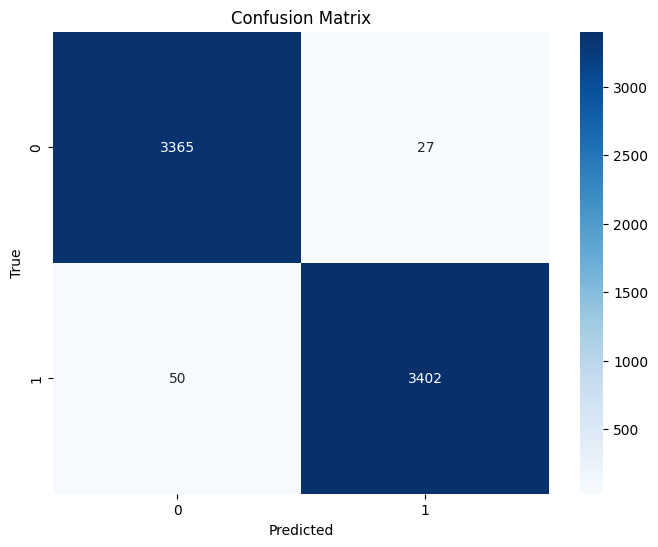

Test Accuracy: 0.9887 | Test Loss: 0.0462


In [54]:
run_model(model_name="bert-base-uncased", batch_size=64)


========== SPLIT TRAIN / VAL / TEST ==========
========== LOAD TOKENIZER & MODEL ==========


Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


========== CREATE DATASETS ==========
========== CREATE DATALOADERS ==========
========== INITIALIZE TRAINER ==========

--------------------------------------------------
	TRAINING MODEL: roberta-base
--------------------------------------------------

Epoch 1/5


Validating: 100%|██████████| 107/107 [00:51<00:00,  2.10it/s]


Train Loss: 0.0764
Val Loss:   0.0277 | Accuracy: 0.9912

Epoch 2/5


Validating: 100%|██████████| 107/107 [00:51<00:00,  2.10it/s]


Train Loss: 0.0252
Val Loss:   0.0305 | Accuracy: 0.9923

Epoch 3/5


Validating: 100%|██████████| 107/107 [00:51<00:00,  2.09it/s]


Train Loss: 0.0117
Val Loss:   0.0450 | Accuracy: 0.9917
Early stopping triggered.

--------------------------------------------------
	EVALUATION ON TEST SET
--------------------------------------------------


Testing: 100%|██████████| 107/107 [00:50<00:00,  2.10it/s]



Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3392
           1       0.99      0.99      0.99      3452

    accuracy                           0.99      6844
   macro avg       0.99      0.99      0.99      6844
weighted avg       0.99      0.99      0.99      6844



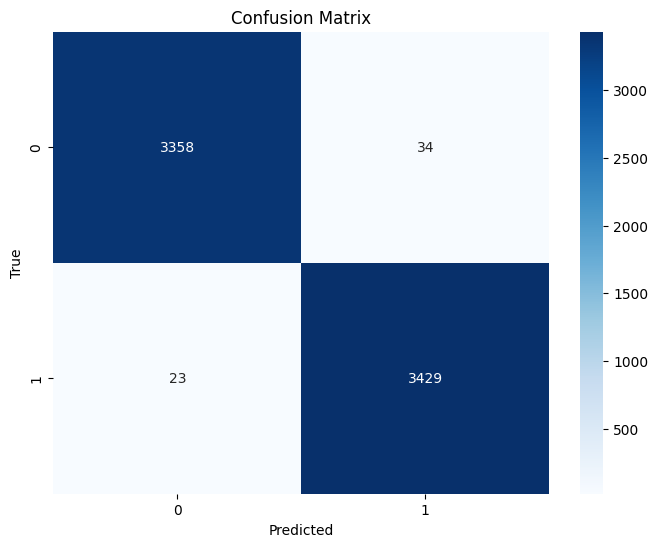

Test Accuracy: 0.9917 | Test Loss: 0.0288


In [34]:
run_model(model_name="roberta-base", batch_size=64)

========== SPLIT TRAIN / VAL / TEST ==========
========== LOAD TOKENIZER & MODEL ==========


Some weights of XLNetForSequenceClassification were not initialized from the model checkpoint at xlnet-base-cased and are newly initialized: ['logits_proj.bias', 'logits_proj.weight', 'sequence_summary.summary.bias', 'sequence_summary.summary.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


========== CREATE DATASETS ==========
========== CREATE DATALOADERS ==========
========== INITIALIZE TRAINER ==========

--------------------------------------------------
	TRAINING MODEL: xlnet-base-cased
--------------------------------------------------

Epoch 1/5


Validating: 100%|██████████| 214/214 [01:58<00:00,  1.81it/s]


Train Loss: 0.0767
Val Loss:   0.0390 | Accuracy: 0.9885

Epoch 2/5


Validating: 100%|██████████| 214/214 [01:58<00:00,  1.81it/s]


Train Loss: 0.0283
Val Loss:   0.0368 | Accuracy: 0.9906

Epoch 3/5


Validating: 100%|██████████| 214/214 [01:58<00:00,  1.81it/s]


Train Loss: 0.0123
Val Loss:   0.0596 | Accuracy: 0.9902

Epoch 4/5


Validating: 100%|██████████| 214/214 [01:58<00:00,  1.81it/s]


Train Loss: 0.0057
Val Loss:   0.0478 | Accuracy: 0.9923
Early stopping triggered.

--------------------------------------------------
	EVALUATION ON TEST SET
--------------------------------------------------


Testing: 100%|██████████| 214/214 [01:58<00:00,  1.81it/s]



Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3392
           1       0.99      0.99      0.99      3452

    accuracy                           0.99      6844
   macro avg       0.99      0.99      0.99      6844
weighted avg       0.99      0.99      0.99      6844



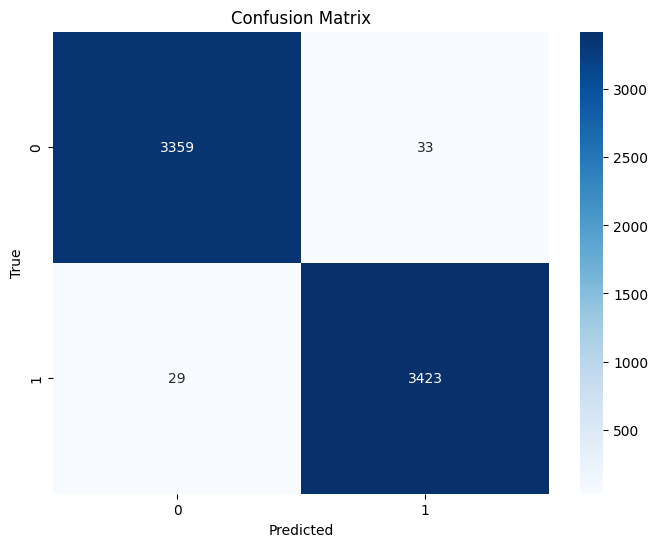

Test Accuracy: 0.9909 | Test Loss: 0.0365


In [39]:
run_model(model_name="xlnet-base-cased", batch_size=32)


In [ ]:

def load_trained_model(model_name, num_labels, checkpoint_path):
    """
    Load lại model đã huấn luyện từ file .pt
    """
    model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=num_labels)
    model.load_state_dict(torch.load(checkpoint_path, map_location="cuda" if torch.cuda.is_available() else "cpu"))
    model.to("cuda" if torch.cuda.is_available() else "cpu")
    model.eval()
    return model

In [ ]:
# Thông tin cần
model_name = "roberta-base"  # ví dụ: bert-base-uncased, xlnet-base-cased,...
num_labels = 2
checkpoint_path = f"/kaggle/working/{model_name}_best.pt"

# Load model đã huấn luyện
def load_trained_model(model_name, num_labels, checkpoint_path):
    model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=num_labels)
    model.load_state_dict(torch.load(checkpoint_path, map_location="cuda" if torch.cuda.is_available() else "cpu"))
    model.to("cuda" if torch.cuda.is_available() else "cpu")
    model.eval()
    return model

model = load_trained_model(model_name, num_labels, checkpoint_path)

# Load lại tokenizer và test_loader
tokenizer = AutoTokenizer.from_pretrained(model_name)

test_dataset = TextClassificationDataset(
    texts=X_test,
    labels=y_test,
    tokenizer=tokenizer,
    max_length=256
)

test_loader = DataLoaderBuilder(
    dataset=test_dataset,
    batch_size=16,
    shuffle=False
).get_dataloader()

# Đánh giá
all_preds, all_labels = [], []
model.eval()

with torch.no_grad():
    for batch in test_loader:
        batch = {k: v.to(model.device) for k, v in batch.items()}
        outputs = model(**batch)
        preds = torch.argmax(outputs.logits, dim=-1)
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(batch['labels'].cpu().numpy())

# In kết quả
print("Classification Report:")
print(classification_report(all_labels, all_preds, target_names=['Fake', 'Real']))

cm = confusion_matrix(all_labels, all_preds)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Fake', 'Real'], yticklabels=['Fake', 'Real'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


In [ ]:
# Thông tin cần
model_name = "xlnet-base-cased"  # ví dụ: bert-base-uncased, xlnet-base-cased,...
num_labels = 2
checkpoint_path = f"/kaggle/working/{model_name}_best.pt"

# Load model đã huấn luyện
def load_trained_model(model_name, num_labels, checkpoint_path):
    model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=num_labels)
    model.load_state_dict(torch.load(checkpoint_path, map_location="cuda" if torch.cuda.is_available() else "cpu"))
    model.to("cuda" if torch.cuda.is_available() else "cpu")
    model.eval()
    return model

model = load_trained_model(model_name, num_labels, checkpoint_path)

# Load lại tokenizer và test_loader
tokenizer = AutoTokenizer.from_pretrained(model_name)

test_dataset = TextClassificationDataset(
    texts=X_test,
    labels=y_test,
    tokenizer=tokenizer,
    max_length=256
)

test_loader = DataLoaderBuilder(
    dataset=test_dataset,
    batch_size=16,
    shuffle=False
).get_dataloader()

# Đánh giá
all_preds, all_labels = [], []
model.eval()

with torch.no_grad():
    for batch in test_loader:
        batch = {k: v.to(model.device) for k, v in batch.items()}
        outputs = model(**batch)
        preds = torch.argmax(outputs.logits, dim=-1)
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(batch['labels'].cpu().numpy())

# In kết quả
print("Classification Report:")
print(classification_report(all_labels, all_preds, target_names=['Fake', 'Real']))

cm = confusion_matrix(all_labels, all_preds)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Fake', 'Real'], yticklabels=['Fake', 'Real'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


Some weights of XLNetForSequenceClassification were not initialized from the model checkpoint at xlnet-base-cased and are newly initialized: ['logits_proj.bias', 'logits_proj.weight', 'sequence_summary.summary.bias', 'sequence_summary.summary.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [57]:
import os
os.path.exists("/kaggle/working/bert-base-uncased_best.pt")



True